# Initial High Level Analysis 

## Objective 
The goal of this notebook is to get a high-level understanding of the data and view the differences between the train and test datasets to help decided how to do a train/eval split.  

### Imports 

In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
train_dataset = pd.read_csv('playground-series-s4e12/train.csv')
test_dataset = pd.read_csv('playground-series-s4e12/test.csv')
sample_submission = pd.read_csv('playground-series-s4e12/sample_submission.csv')

### Histograms, Boxplots, Charts

In [3]:
warnings.filterwarnings('ignore', category=FutureWarning)

In [4]:
train_dataset_1 = train_dataset.replace([-np.inf, np.inf], np.nan)
test_dataset_1 = test_dataset.replace([-np.inf, np.inf], np.nan)

In [5]:
test_dataset_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800000 entries, 0 to 799999
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    800000 non-null  int64  
 1   Age                   787511 non-null  float64
 2   Gender                800000 non-null  object 
 3   Annual Income         770140 non-null  float64
 4   Marital Status        787664 non-null  object 
 5   Number of Dependents  726870 non-null  float64
 6   Education Level       800000 non-null  object 
 7   Occupation            560875 non-null  object 
 8   Health Score          750551 non-null  float64
 9   Location              800000 non-null  object 
 10  Policy Type           800000 non-null  object 
 11  Previous Claims       557198 non-null  float64
 12  Vehicle Age           799997 non-null  float64
 13  Credit Score          708549 non-null  float64
 14  Insurance Duration    799998 non-null  float64
 15  

In [6]:
def plot_histograms(num_bins, column_name):
    """
    Plots histograms for the specified column in train and test datasets.

    Parameters:
        num_bins (int): Number of bins for the histograms.
        column_name (str): The column name to plot.

    Returns:
        None
    """
    fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)
    
    # Histogram for train_dataset_1
    sns.histplot(train_dataset_1[column_name], color='blue', bins=num_bins, ax=axes[0])
    axes[0].set_title(f'Distribution of {column_name} in Train Dataset', fontsize=16)
    axes[0].set_xlabel(column_name, fontsize=14)
    axes[0].set_ylabel('Frequency', fontsize=14)
    axes[0].grid(axis='y', linestyle='--', alpha=0.7)

    # Histogram for test_dataset_1
    sns.histplot(test_dataset_1[column_name], color='green', bins=num_bins, ax=axes[1])
    axes[1].set_title(f'Distribution of {column_name} in Test Dataset', fontsize=16)
    axes[1].set_xlabel(column_name, fontsize=14)
    axes[1].set_ylabel('Frequency', fontsize=14)
    axes[1].grid(axis='y', linestyle='--', alpha=0.7)

    # Adjust layout and display the plots
    plt.tight_layout()
    plt.show()


In [7]:
def plot_pie_charts(column_name):
    """
    Plots pie charts for the specified column in train and test datasets.

    Parameters:
        column_name (str): The column name to plot.

    Returns:
        None
    """
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    # Pie chart for train_dataset_1
    train_counts = train_dataset_1[column_name].value_counts()
    axes[0].pie(train_counts, labels=train_counts.index, autopct='%1.1f%%')
    axes[0].set_title(f'{column_name} Distribution in Train Dataset', fontsize=16)

    # Pie chart for test_dataset_1
    test_counts = test_dataset_1[column_name].value_counts()
    axes[1].pie(test_counts, labels=test_counts.index, autopct='%1.1f%%')
    axes[1].set_title(f'{column_name} Distribution in Test Dataset', fontsize=16)

    # Adjust layout and display the plots
    plt.tight_layout()
    plt.show()


In [8]:
def plot_box_plots(column_name): 
    """
    Plots box plots for the specified column in train and test datasets.

    Parameters:
        column_name (str): The column name to plot.

    Returns:
        None
    """
    
    fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)
    
    # Boxplot for train_dataset_1
    sns.boxplot(y=train_dataset_1[column_name], color='blue', ax=axes[0])
    axes[0].set_title(f'Distribution of {column_name} in Test Dataset', fontsize=16)
    axes[0].set_ylabel(f'{column_name}', fontsize=14)
    axes[0].grid(axis='y', linestyle='--', alpha=0.7)
    
    # Boxplot for test_dataset_1
    sns.boxplot(y=test_dataset_1[column_name], color='green', ax=axes[1])
    axes[1].set_title(f'Distribution of {column_name} in Test Dataset', fontsize=16)
    axes[1].set_ylabel(f'{column_name}', fontsize=14)
    axes[1].grid(axis='y', linestyle='--', alpha=0.7)
    
    # Adjust layout and display the plots
    plt.tight_layout()
    plt.show()


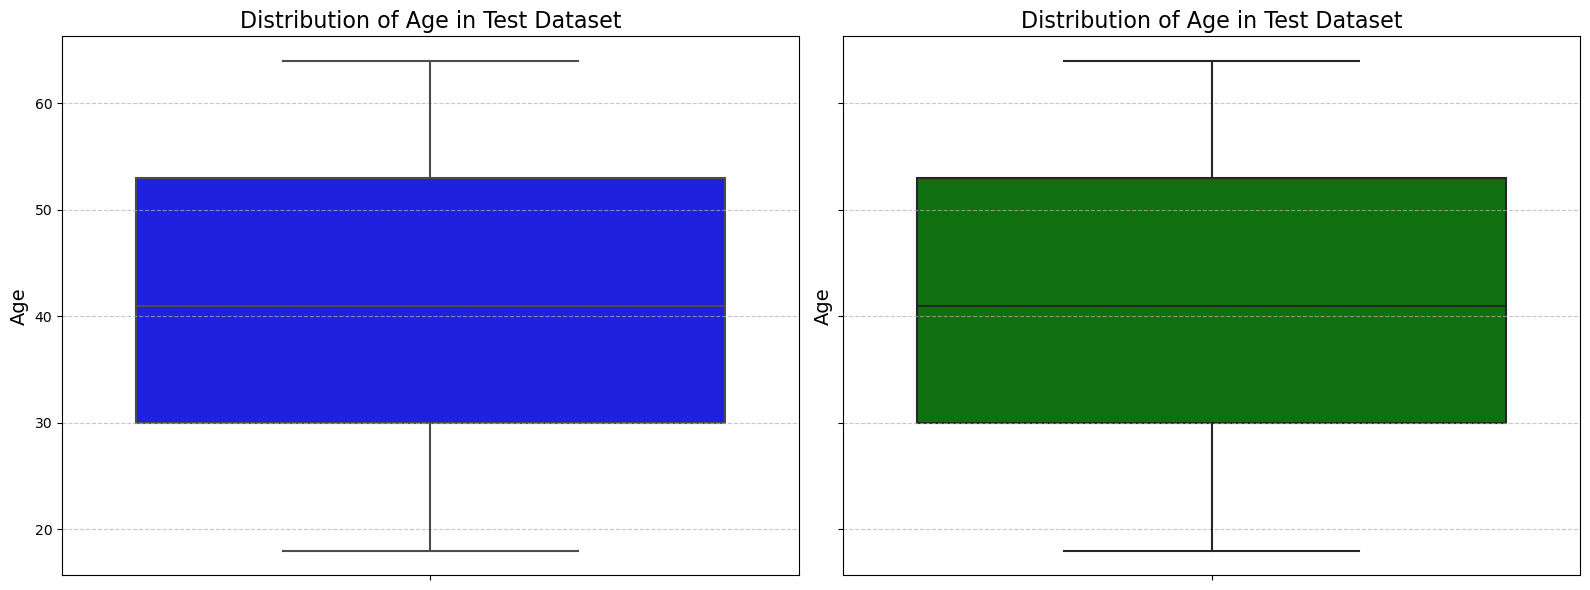

In [9]:
plot_box_plots('Age')

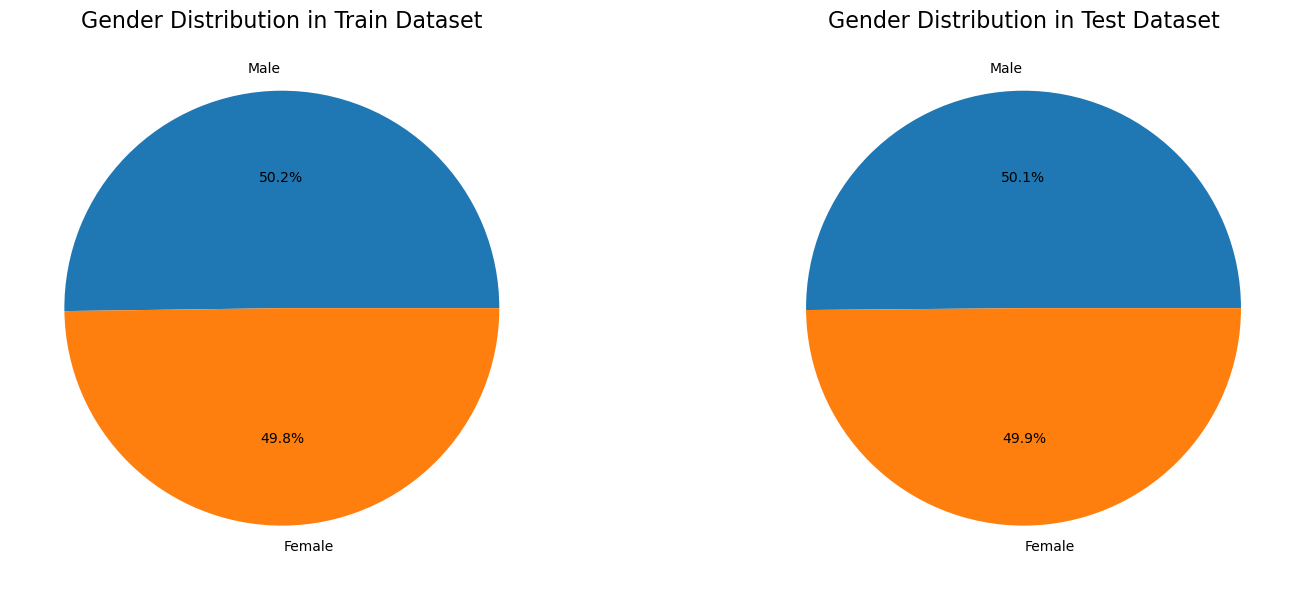

In [10]:
plot_pie_charts('Gender')

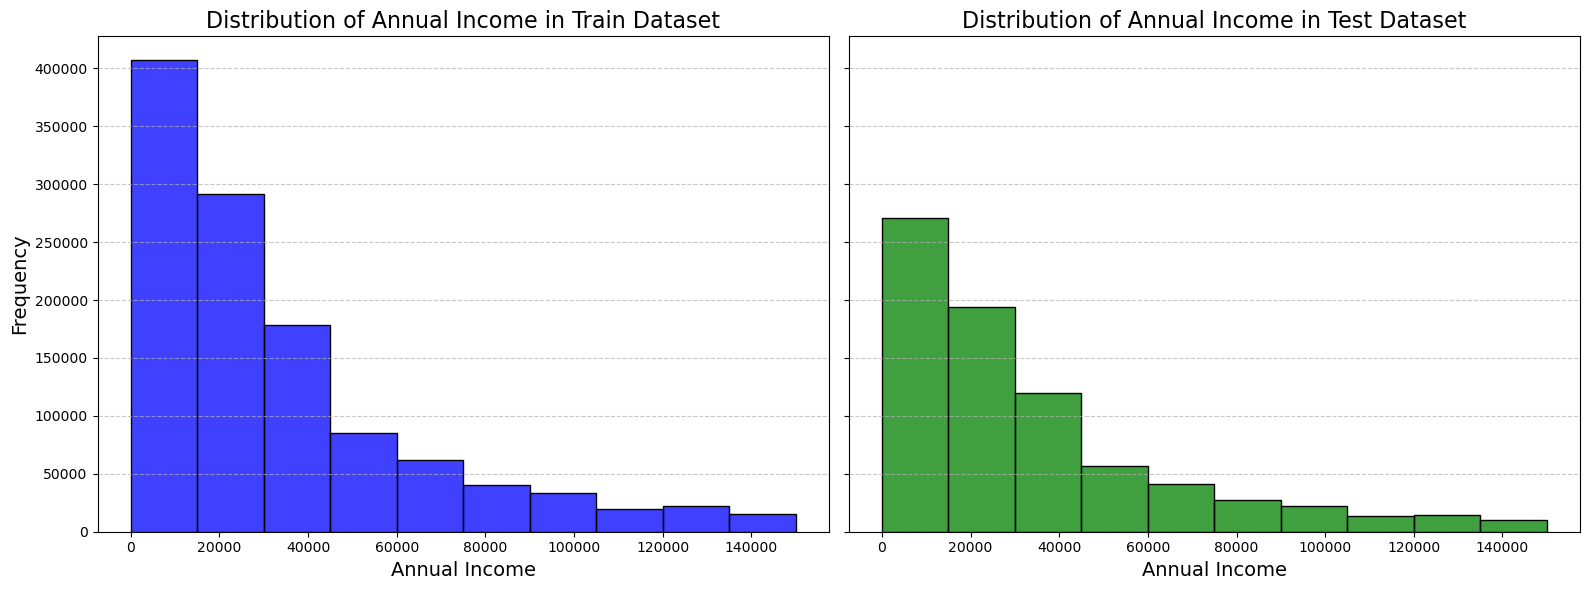

In [11]:
plot_histograms(10, 'Annual Income')

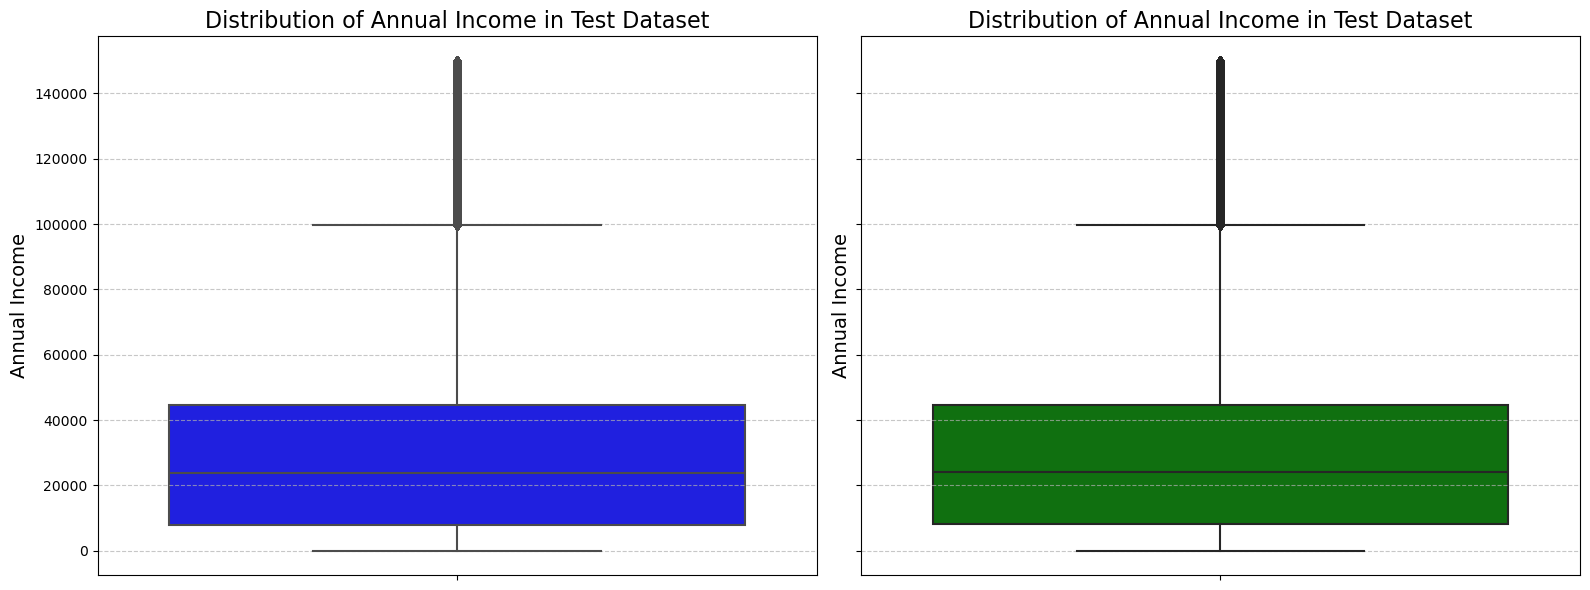

In [12]:
plot_box_plots('Annual Income')

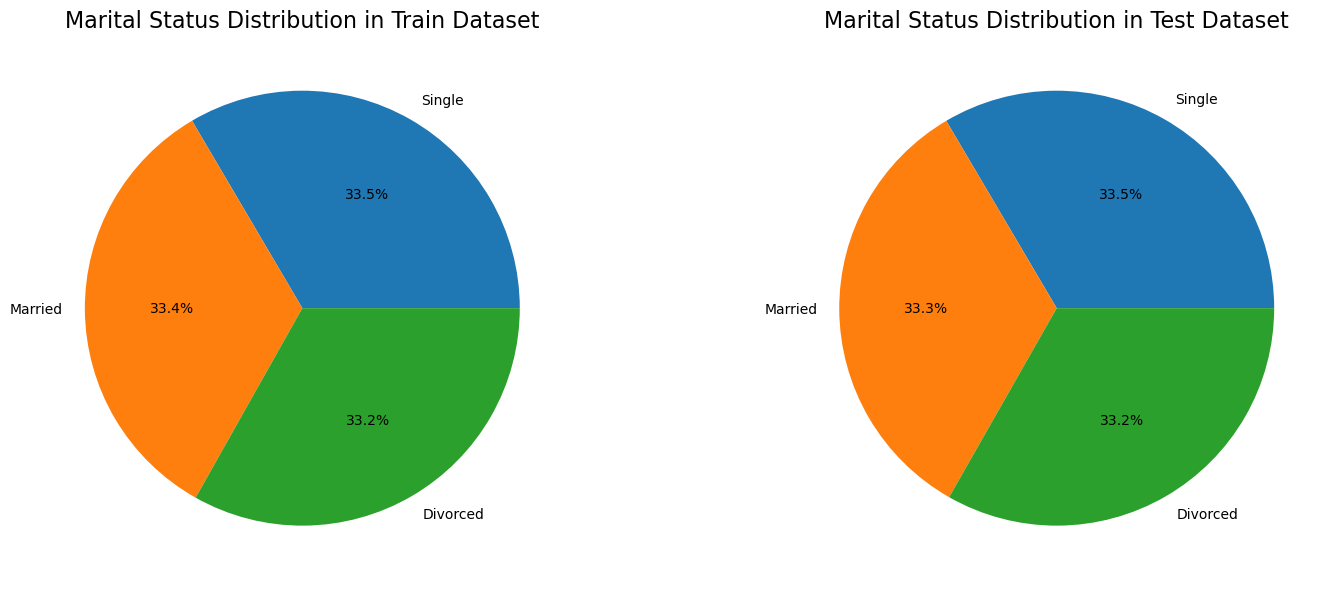

In [13]:
plot_pie_charts('Marital Status')

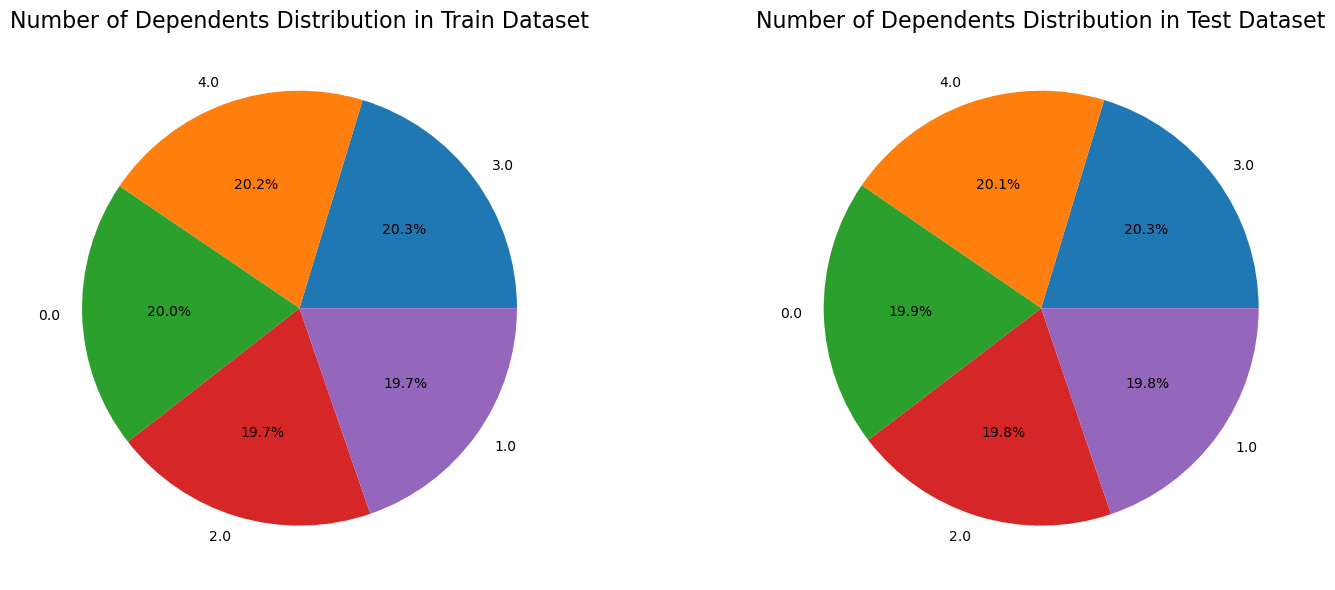

In [14]:
plot_pie_charts('Number of Dependents')

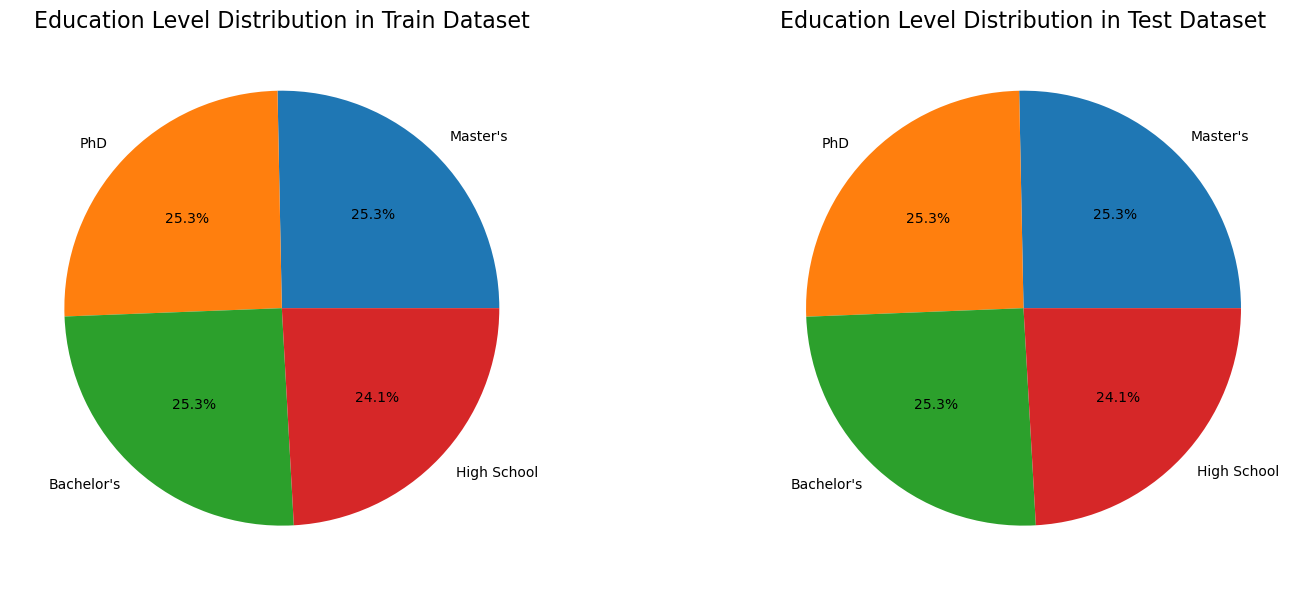

In [15]:
plot_pie_charts('Education Level')

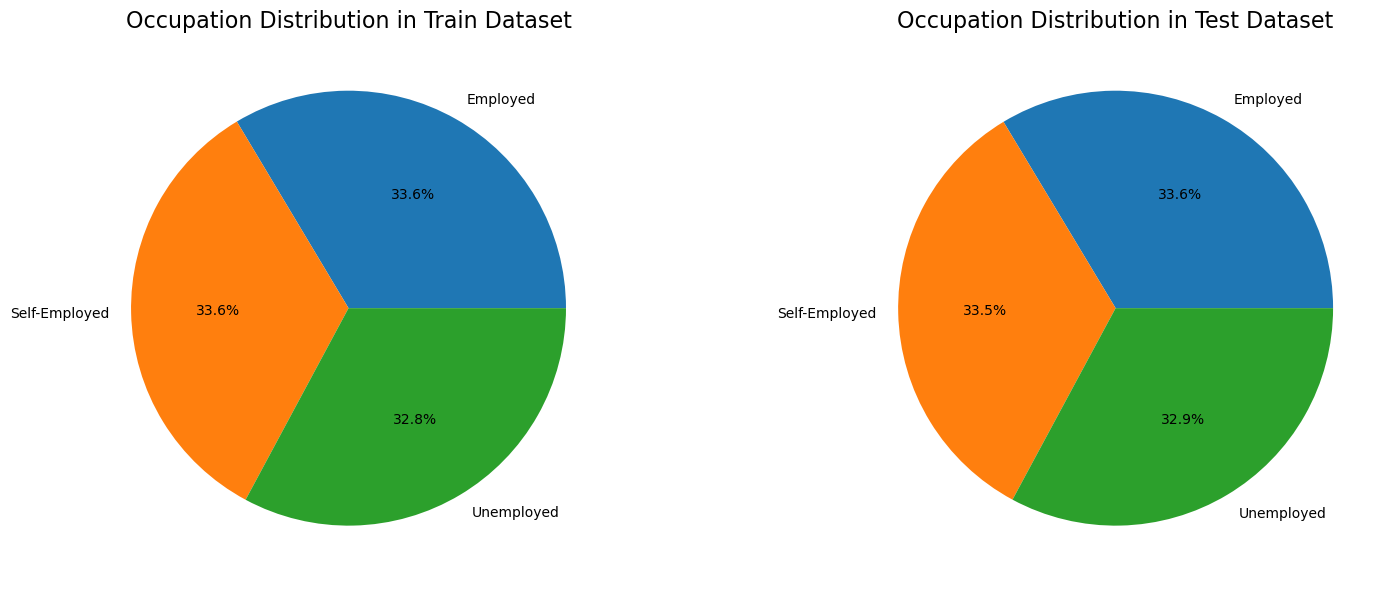

In [16]:
plot_pie_charts('Occupation')

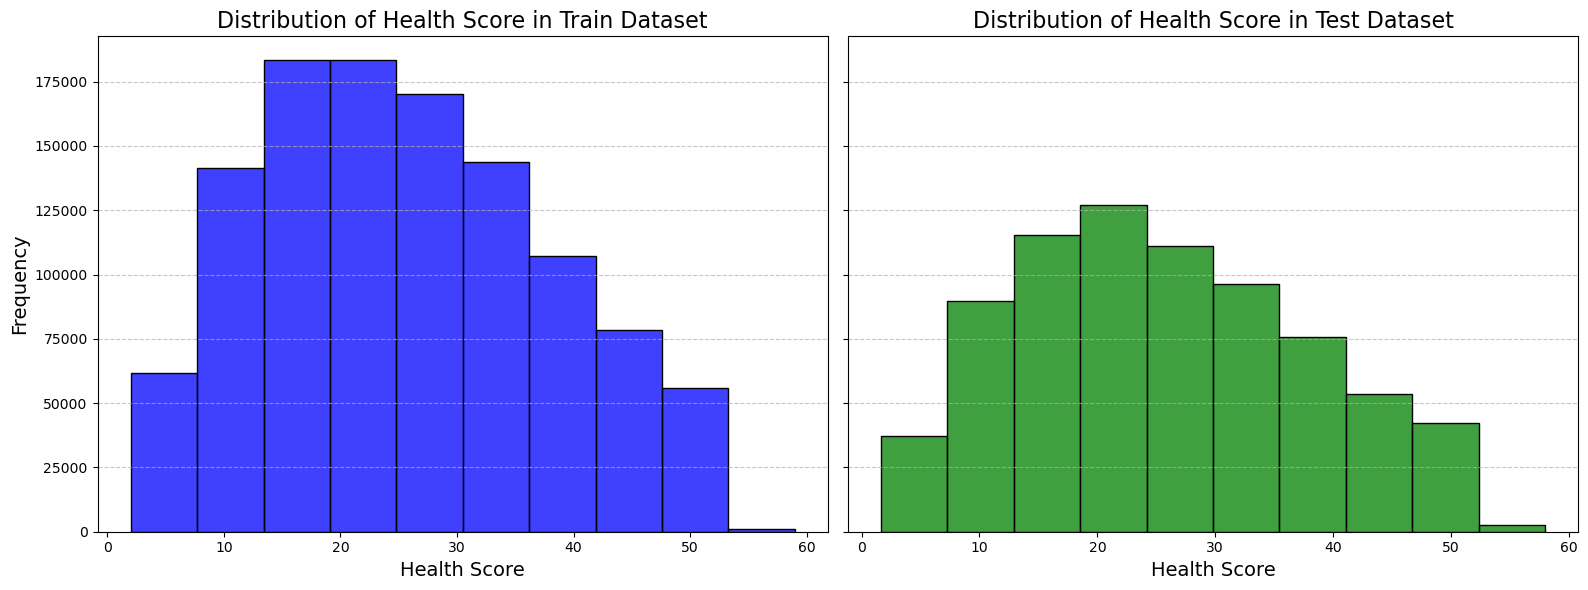

In [17]:
plot_histograms(10, 'Health Score')

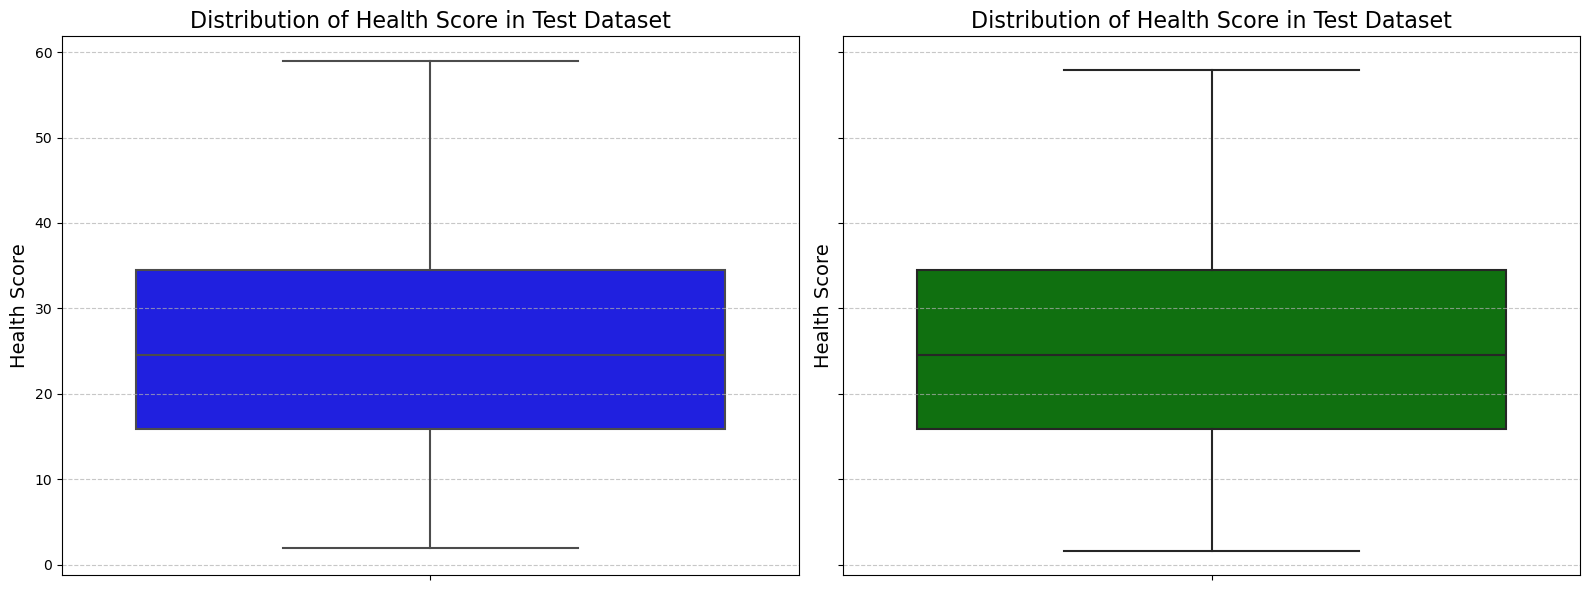

In [18]:
plot_box_plots('Health Score')

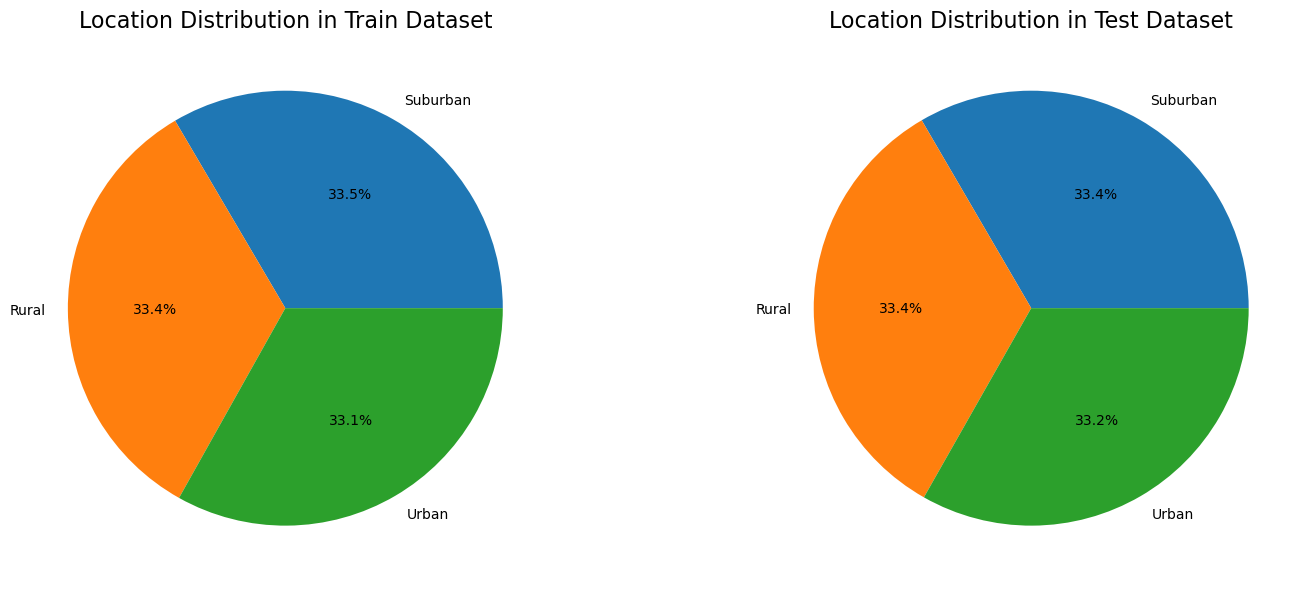

In [19]:
plot_pie_charts('Location')

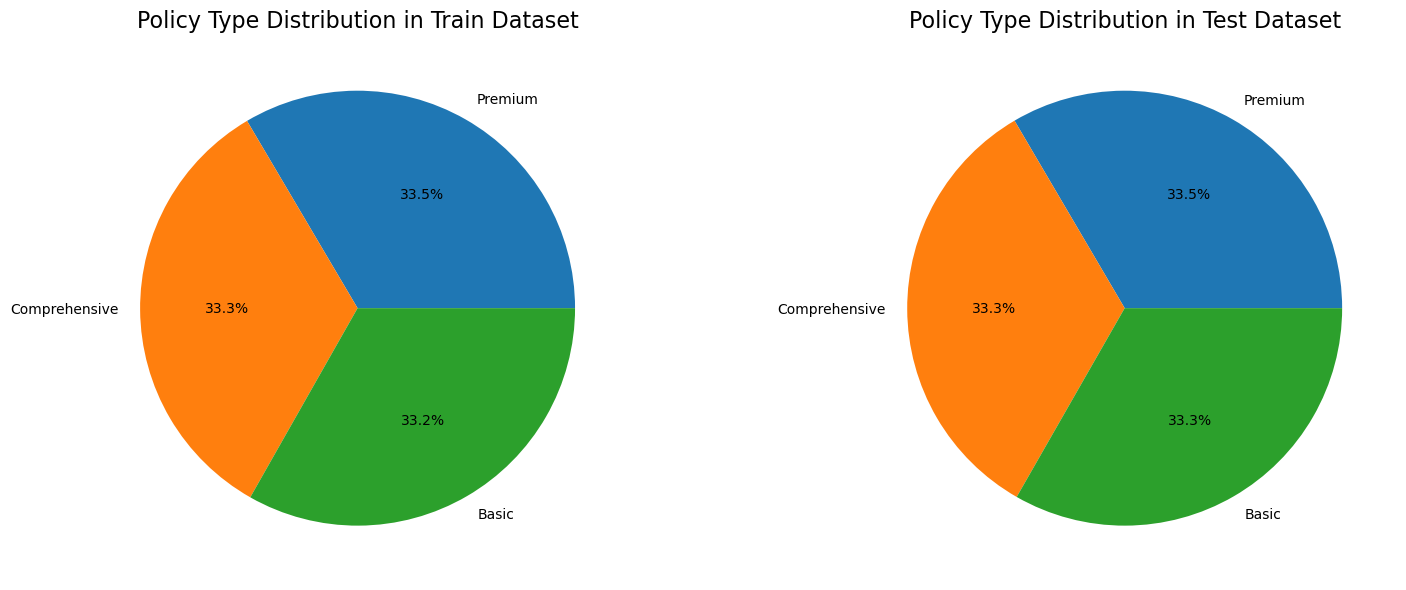

In [20]:
plot_pie_charts('Policy Type')

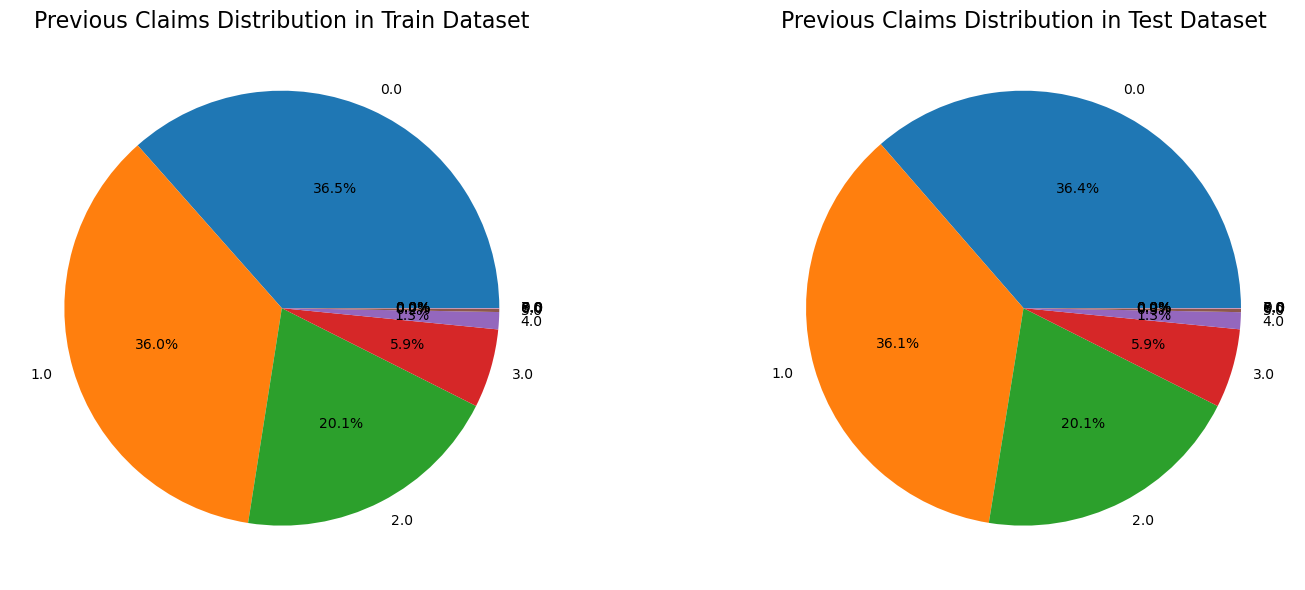

In [21]:
plot_pie_charts('Previous Claims')

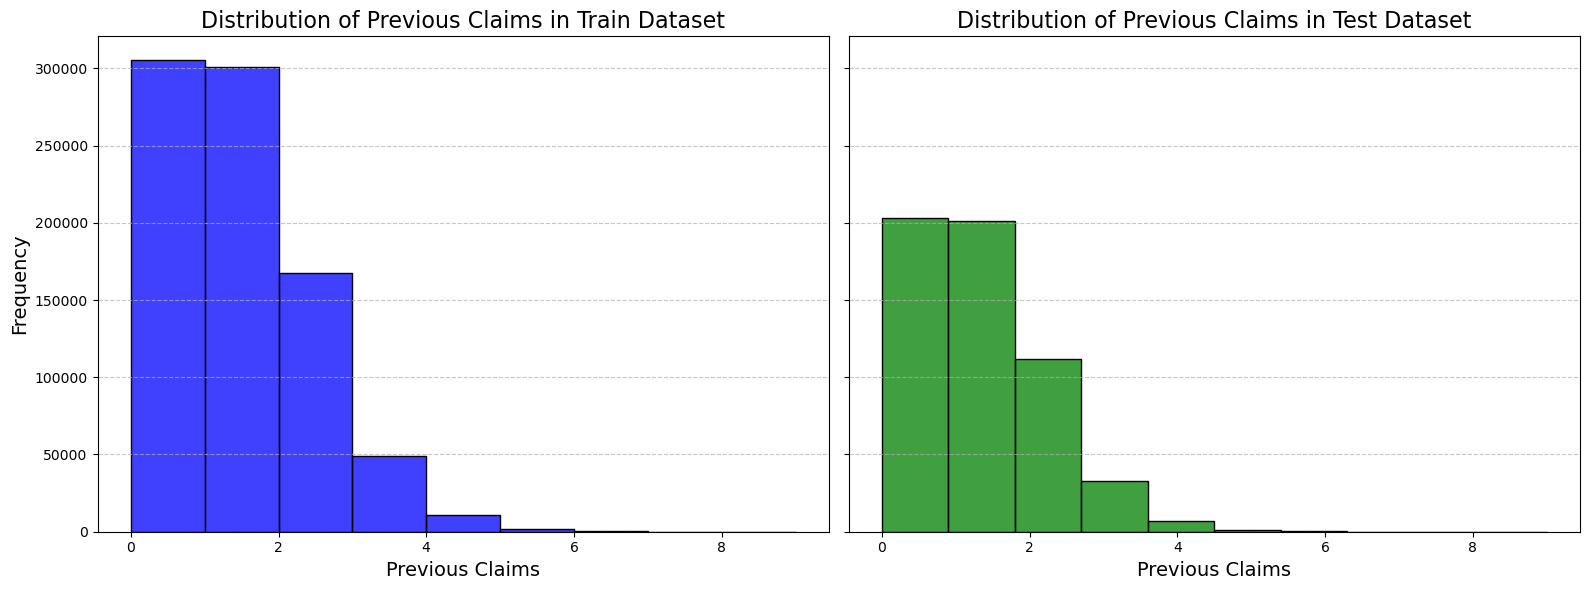

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)
# Histogram for train_dataset_1
sns.histplot(train_dataset_1['Previous Claims'], color='blue', bins=9, ax=axes[0])
axes[0].set_title('Distribution of Previous Claims in Train Dataset', fontsize=16)
axes[0].set_xlabel('Previous Claims', fontsize=14)
axes[0].set_ylabel('Frequency', fontsize=14)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Histogram for test_dataset_1
sns.histplot(test_dataset_1['Previous Claims'], color='green', bins=10, ax=axes[1])
axes[1].set_title('Distribution of Previous Claims in Test Dataset', fontsize=16)
axes[1].set_xlabel('Previous Claims', fontsize=14)
axes[1].set_ylabel('Frequency', fontsize=14)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

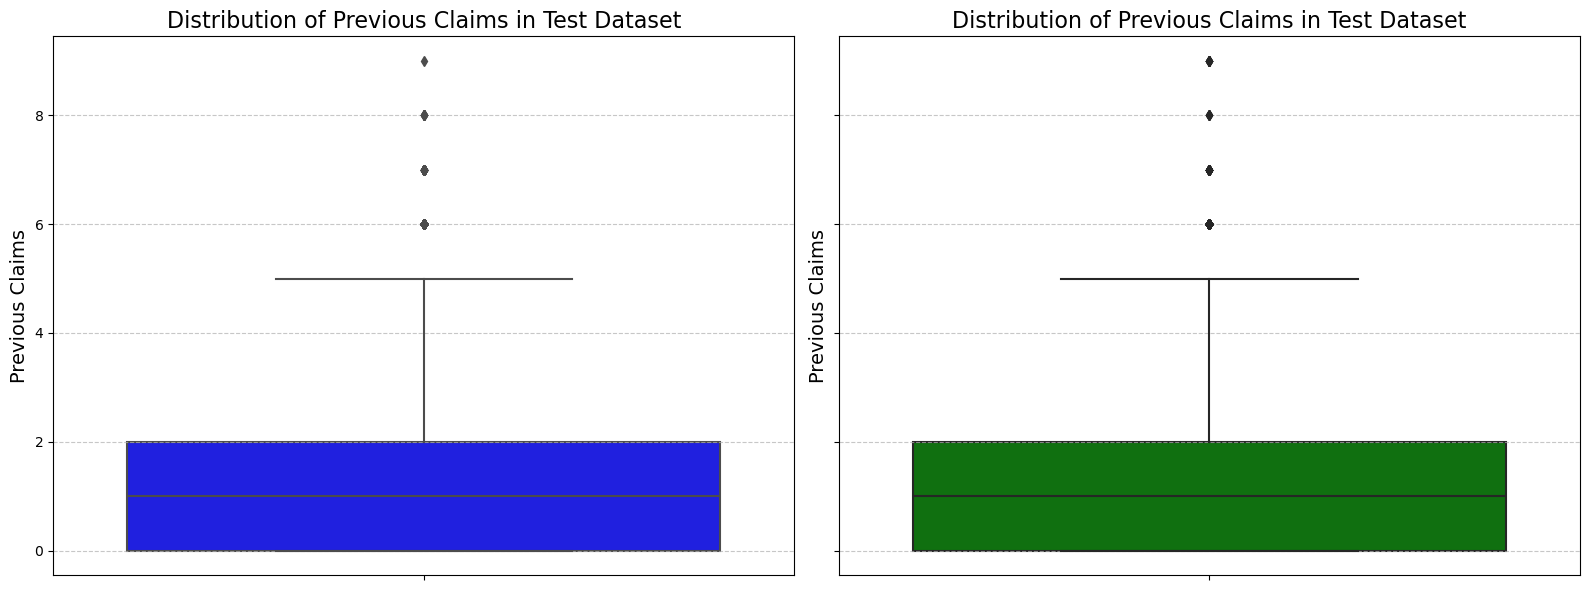

In [23]:
plot_box_plots('Previous Claims')

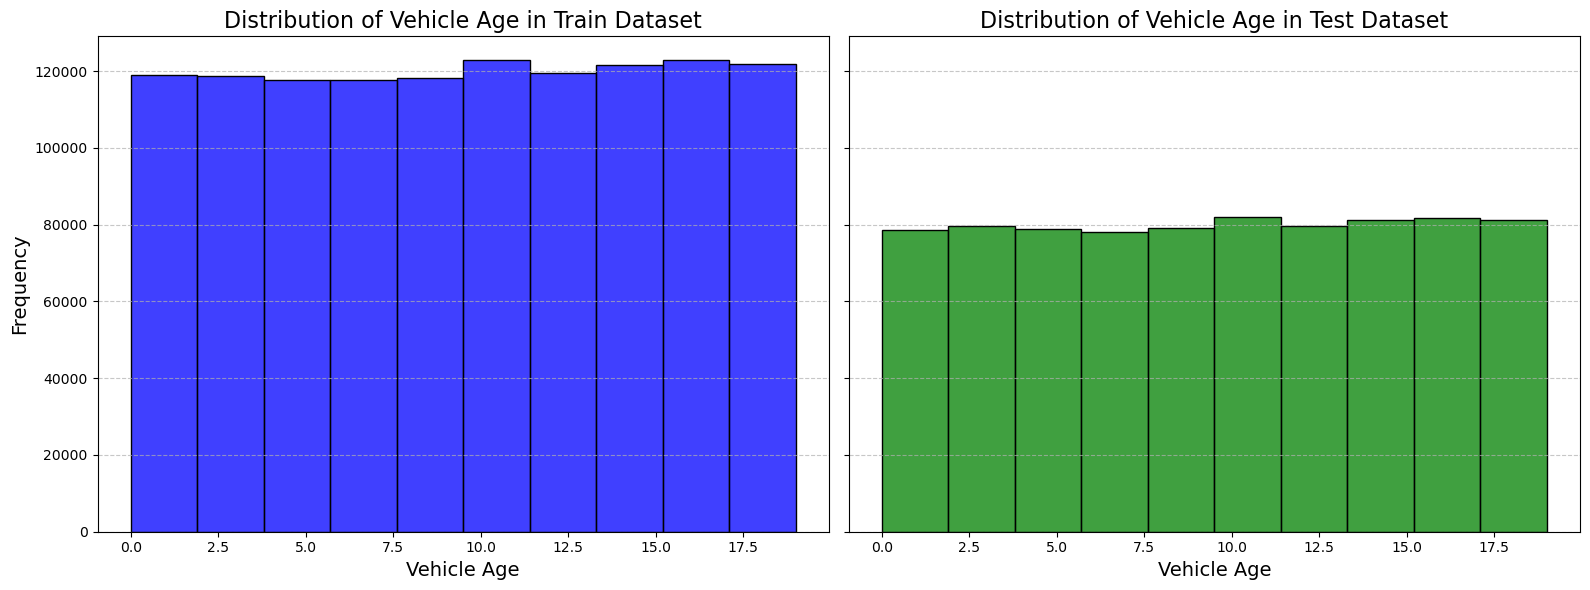

In [24]:
plot_histograms(10, 'Vehicle Age')

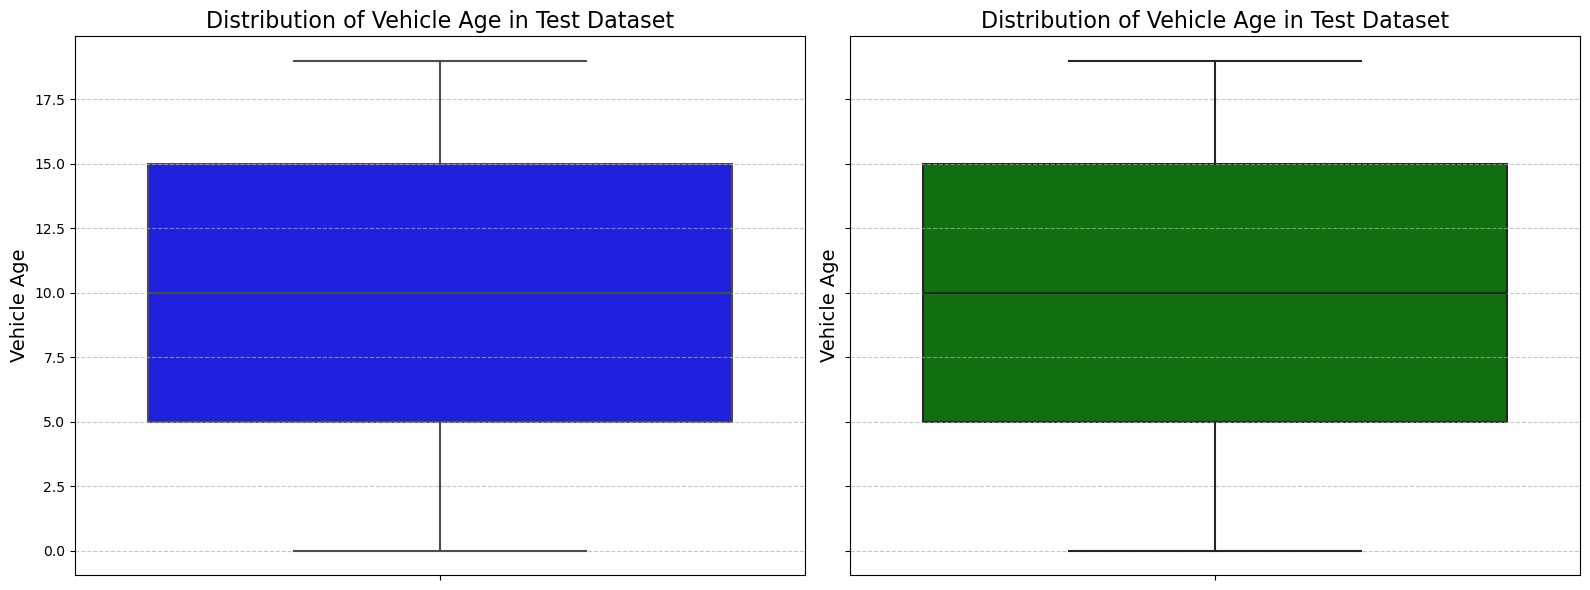

In [25]:
plot_box_plots('Vehicle Age')

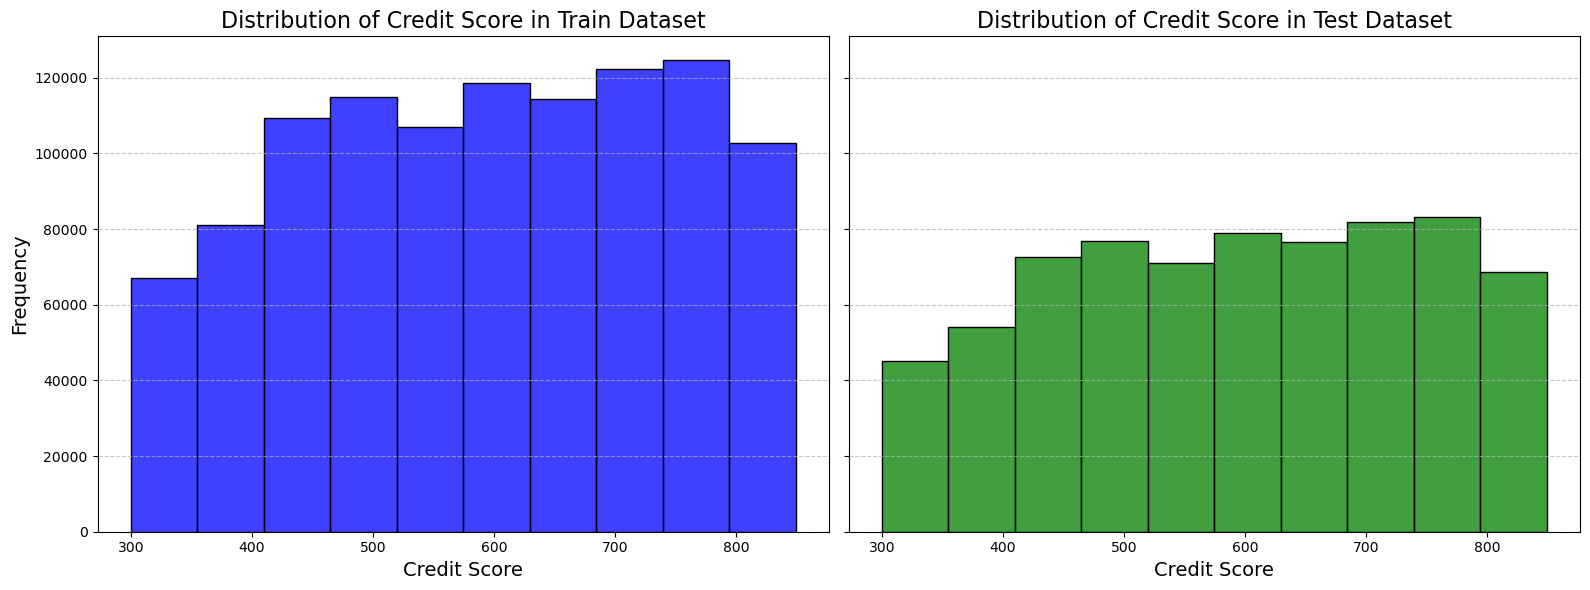

In [26]:
plot_histograms(10, 'Credit Score')

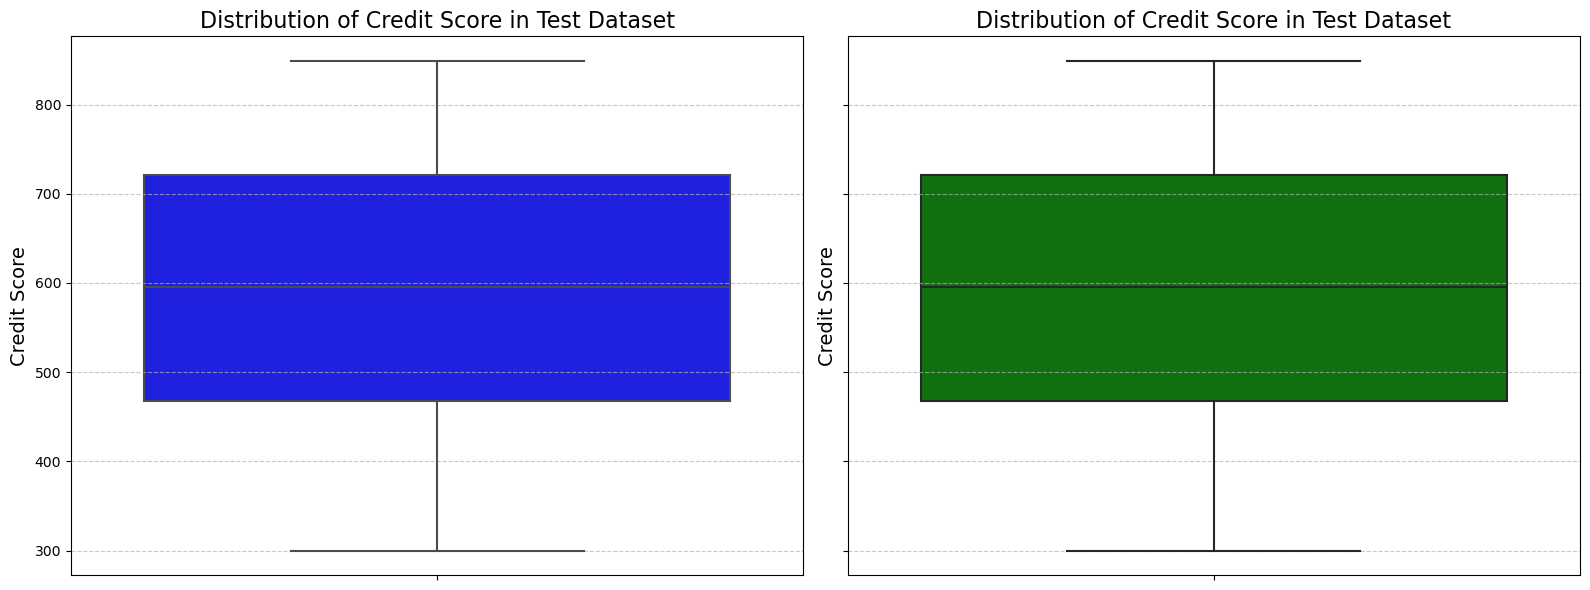

In [27]:
plot_box_plots('Credit Score')

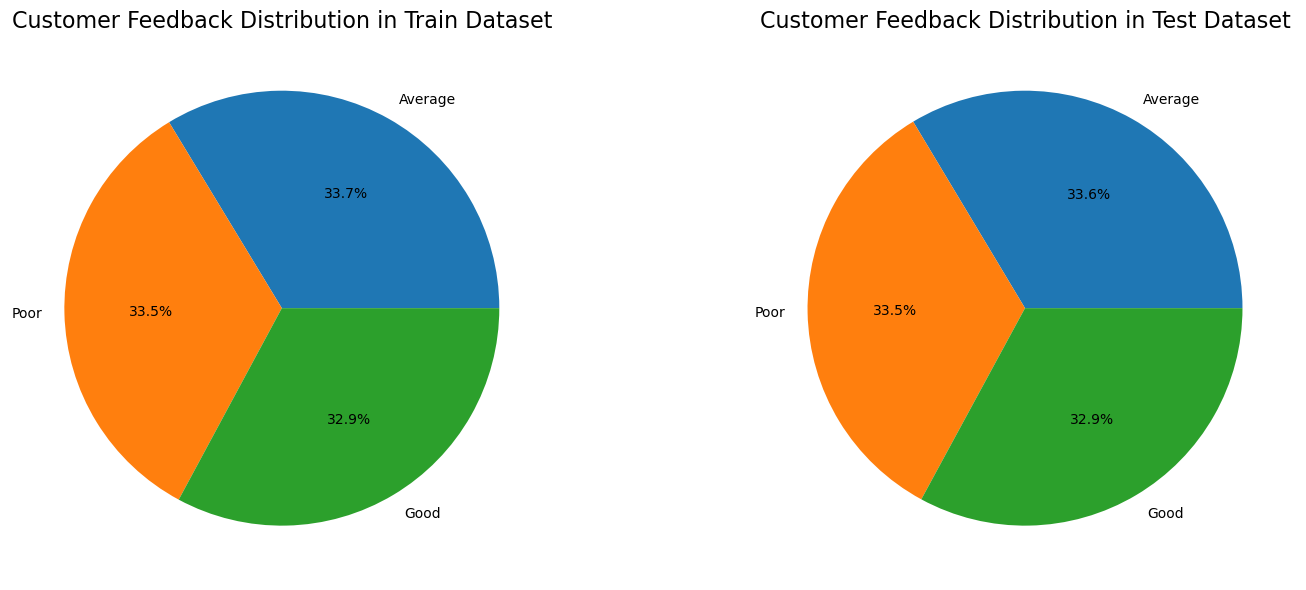

In [28]:
plot_pie_charts('Customer Feedback')

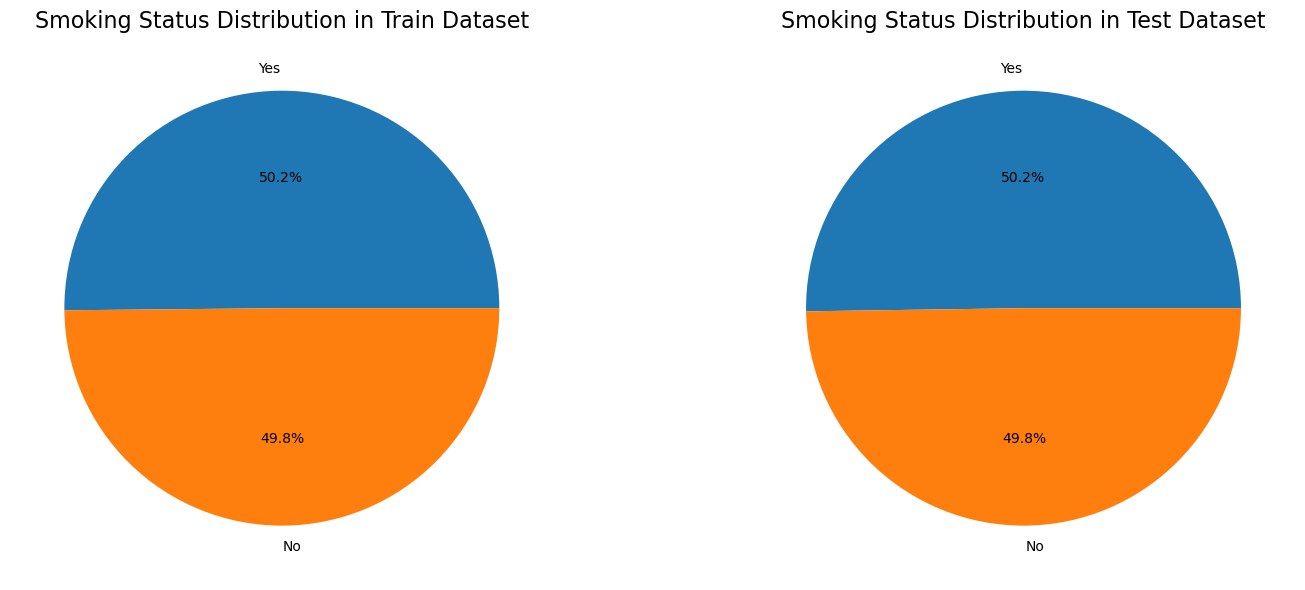

In [29]:
plot_pie_charts('Smoking Status')

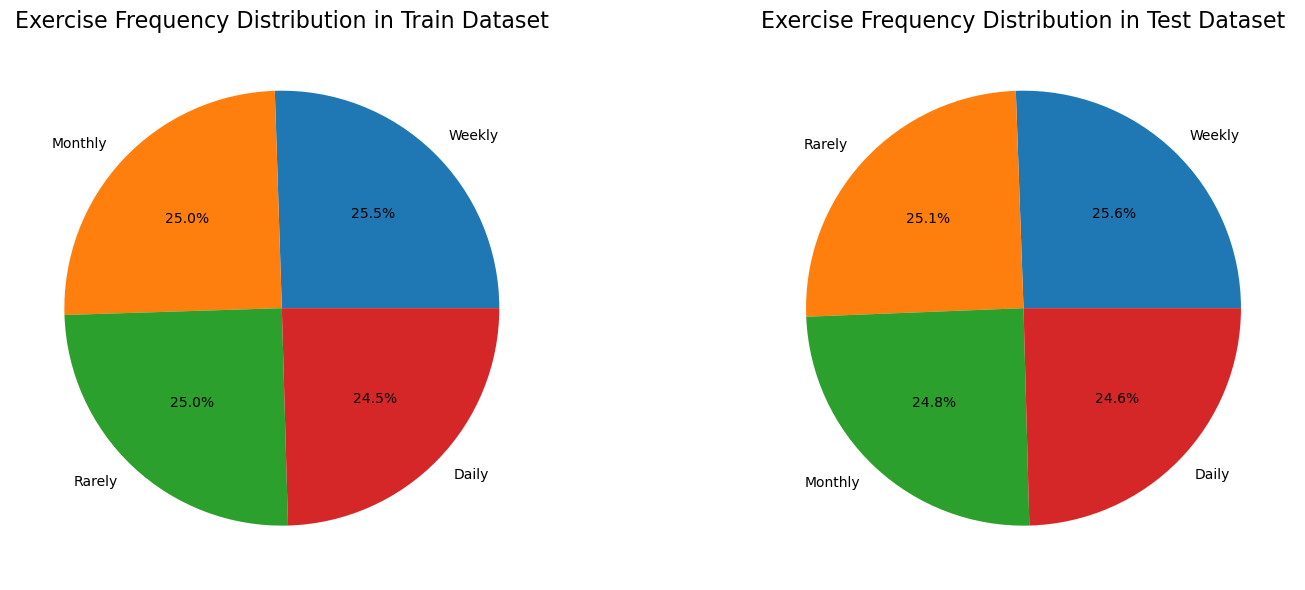

In [30]:
plot_pie_charts('Exercise Frequency')

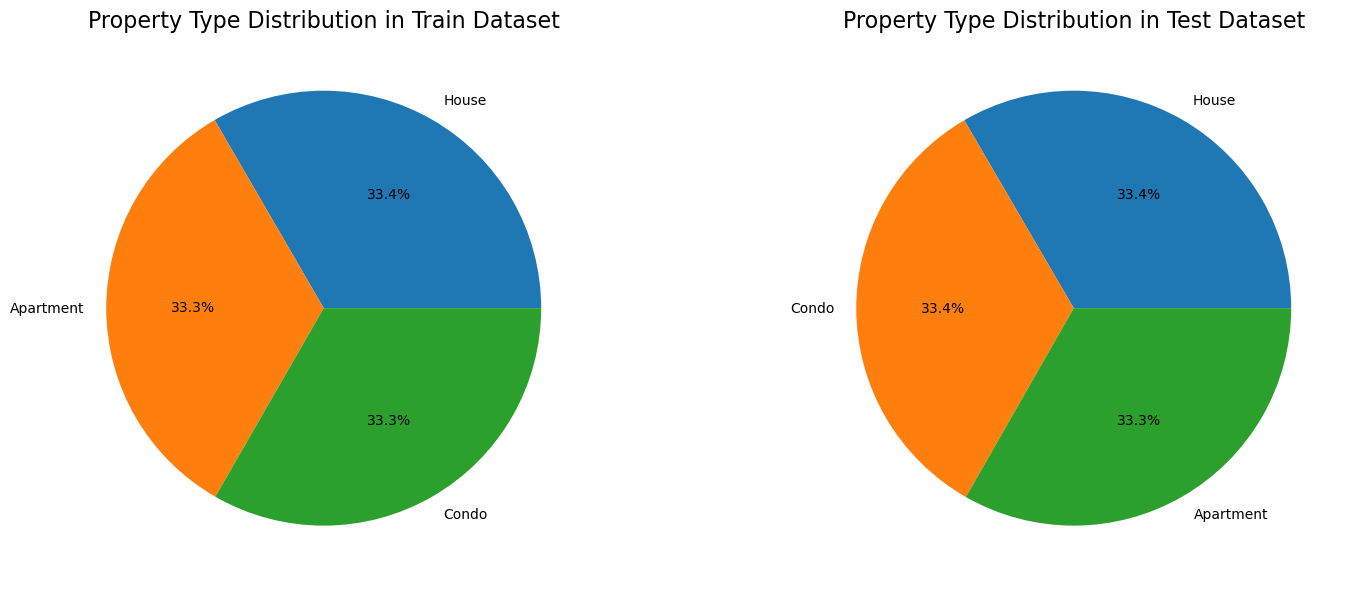

In [31]:
plot_pie_charts('Property Type')

## Train Test Split
- 80/20 Split seems reseaonable
- Divide into train test split. Stratisfied sampling with income and credit scores
- No outlier removal since they are also in the test-set. Want to make sure our model sees outlier examples

In [40]:
# Create Annual Income  categories using pd.cut
train_dataset_1['Income_Category'] = pd.cut(
    train_dataset_1['Annual Income'],
    bins=5,
    labels=['Very Low', 'Low', 'Medium', 'High', 'Very High']
)

# Create credit score categories using pd.cut
train_dataset_1['Credit_Score_Category'] = pd.cut(
    train_dataset_1['Credit Score'],
    bins=5,
    labels=['Very Low', 'Low', 'Medium', 'High', 'Very High']
)


In [41]:
# Combine Annual Income  and Credit Score categories for stratification
# Add 'missing' as a category to both categorical columns
train_dataset_1['Income_Category'] = train_dataset_1['Income_Category'].cat.add_categories('missing')
train_dataset_1['Credit_Score_Category'] = train_dataset_1['Credit_Score_Category'].cat.add_categories('missing')


In [42]:
train_dataset_1['Income_Category'] = train_dataset_1['Income_Category'].fillna('missing')
train_dataset_1['Credit_Score_Category'] = train_dataset_1['Credit_Score_Category'].fillna('missing')

In [43]:
stratify_col = train_dataset_1['Income_Category'].astype(str) + train_dataset_1['Credit_Score_Category'].astype(str)

In [44]:
# Create the train-test split
df_train, df_eval = train_test_split(
    train_dataset_1,
    test_size=0.2,
    random_state=42,
    stratify=stratify_col
)

# Remove the temporary columns
df_train = df_train.drop(['Income_Category', 'Credit_Score_Category'], axis=1)
df_eval = df_eval.drop(['Income_Category', 'Credit_Score_Category'], axis=1)

In [45]:
# Export the processed datasets to CSV files
df_train.to_csv('df_train.csv', index=False)
df_eval.to_csv('df_eval.csv', index=False)